In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


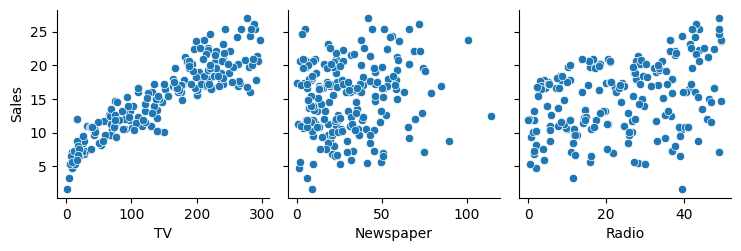

In [6]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

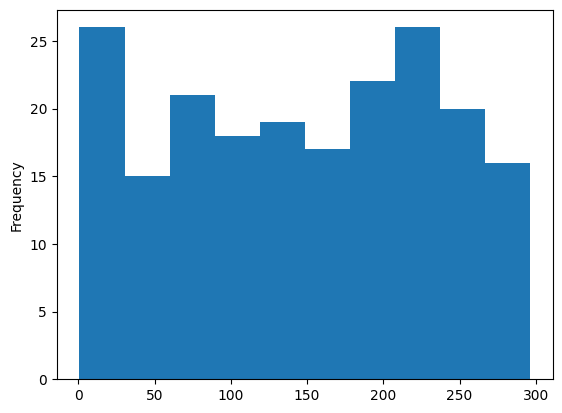

In [7]:
data['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

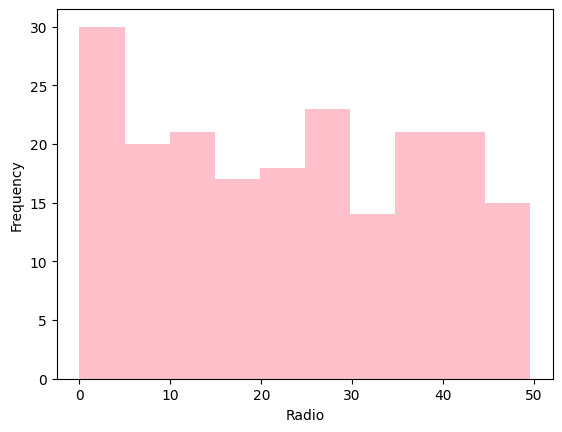

In [8]:
data['Radio'].plot.hist(bins=10,color="pink",xlabel="Radio")


<Axes: xlabel='Newspaper', ylabel='Frequency'>

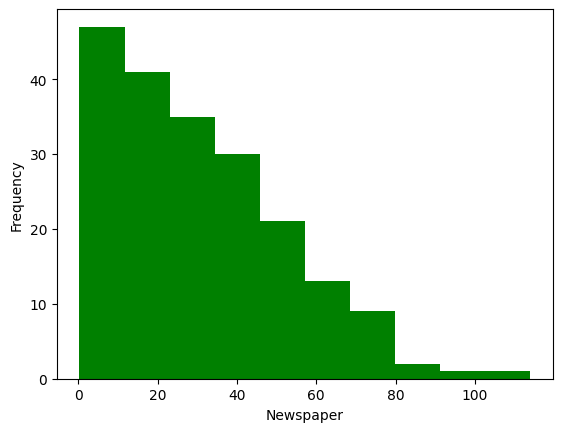

In [9]:
data['Newspaper'].plot.hist(bins=10,color="green",xlabel="Newspaper")


In [10]:
from sklearn.model_selection import train_test_split
x=data.drop("Sales",axis=1)
y=data["Sales"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
print(x_train)

        TV  Radio  Newspaper
131  265.2    2.9       43.0
96   197.6    3.5        5.9
181  218.5    5.4       27.4
19   147.3   23.9       19.1
153  171.3   39.7       37.7
..     ...    ...        ...
67   139.3   14.5       10.2
192   17.2    4.1       31.6
117   76.4    0.8       14.8
47   239.9   41.5       18.5
172   19.6   20.1       17.0

[140 rows x 3 columns]


In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
res=model.predict(x_test)
print(res)

[10.68909303  8.67371102  9.59969914 24.99989846 14.73590568  8.37604918
 10.70350416 18.37670708  9.9670026  17.87946837 23.52765543 10.70692059
 13.37566958 17.10051561 11.77005197 13.31194616 21.13395461  9.10945664
 14.24009701 18.86885012 25.00670623 12.42508633 16.61899482 13.84289673
  7.80458355 15.13012055 14.69687153 20.70140682 16.9844145   8.94984434
 12.59168427 20.93257626 21.34337227 21.89151357  7.23908022  7.06001103
  9.28335812 15.6840471  13.33894748  7.28903633 11.05676585  9.08768206
 15.60592891 18.21716827 18.9560652  13.47385617  5.36520991 10.59696871
 15.66036131 10.98229096 12.20805533 20.70970272 20.70533061 16.95931925
  9.96622132  9.44413497 23.60505449 15.99066008 18.06706692  8.25675464]


In [15]:
from sklearn.metrics import mean_squared_error,r2_score 
mse=mean_squared_error(y_test,res)
r2=r2_score(y_test,res)
print("mean squared error",mse)
print("r2 score",r2)

mean squared error 3.9380152204802865
r2 score 0.8692052734910128


In [16]:
new_data=pd.DataFrame({'TV':[200],'Radio':[40],'Newspaper':[20]})
predicted_sales=model.predict(new_data)
print("predicted seles",predicted_sales)

predicted seles [19.86924461]
